# Nhập môn máy học
 * Bài thực hành số 2: Gradient Descent và Linear Regression
 * Sinh viên: Huỳnh Thị Bảo Trân
 * MSSV: 19110482

## Bài tập
Cho dữ liệu gồm 100 hàng, gồm chiều rộng, chiều dài và giá của một ngôi nhà, hay xây dựng một mô hình dư đoán giá nhà dựa vào chiều dài và rộng với giả thuyết
$$ \text{giá} = a * \text{rộng} + b* \text{dài} + c , a, b, c \in \mathbb{R}$$
- Dùng Gradient Descent giải Linear Regression cho bài toán này 
    - khởi tạo tham số, chỉnh số vòng lặp và learning rate cho phù hợp
    - Hint:  để GD dễ hội tụ hơn nên Normalization input trước
- So sánh kết quả (MSE) với Exact Solution và kết quả từ Sklearn

## Nộp bài
- Code và chạy kết quả lưu vào file notebook NMMH_TH2_MSSV.ipynb (notebook phải có kết quả chạy nếu ko xem như chưa làm)
- Nén thành file NMMH_TH2_MSSV.ipynb và nộp về: huynhthanh98vn@gmail.com,  với tiêu đề NMMH_TH2_MSSV
- Deadline: 23g59 thứ 7 ngày 23/04/2022. Nộp trễ bị chia đôi số điểm.

In [35]:
# cac thu vien duoc su dung
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [36]:
# load du lieu
dataset = pd.read_csv('House_Price_2.csv')
dataset.head()

,width,length,price
0,28,97,3.350184e+08
1,21,62,2.298295e+08
2,27,64,2.603552e+08
3,5,92,2.064708e+08
4,13,84,2.339808e+08


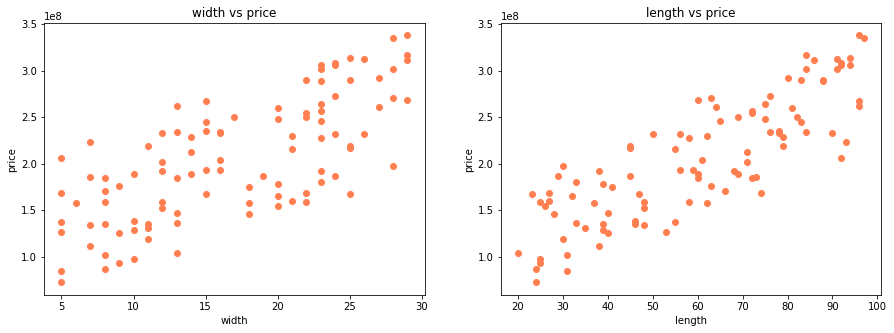

In [37]:
# ve hinh
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.scatter(dataset['width'], dataset['price'], color = 'coral')
plt.xlabel('width')
plt.ylabel('price')
plt.title('width vs price')

plt.subplot(1, 2, 2)
plt.scatter(dataset['length'], dataset['price'], color = 'coral')
plt.xlabel('length')
plt.ylabel('price')
plt.title('length vs price')

plt.show()

C:\Users\LT-030~1\AppData\Local\Temp/ipykernel_15264/1980360157.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


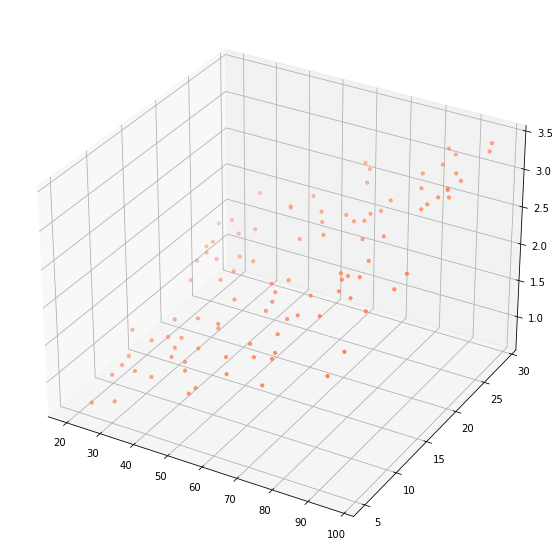

In [38]:
# ve hinh
fig = plt.figure(figsize = (15, 10))
ax = fig.gca(projection = '3d')
ax.scatter(dataset.length, dataset.width, dataset.price, s = 10, color = 'coral')
plt.show()

In [39]:
# cac gia tri
x = dataset.drop(['price'], axis = 1)
y = dataset.price
z = np.concatenate([x, np.ones((x.shape[0], 1))], axis = -1)

In [40]:
# Gradient Descent
theta = np.ones(np.size(z, 1))
n_iter = 100000
lmda = 0.0001
for ii in range(n_iter):
    error = y - np.matmul(z, theta)
    theta =  theta - 2/z.shape[0]*lmda*np.matmul(-z.T, error)
    if ii % 1000 == 0:
        loss = np.mean(np.square(y - np.matmul(z, theta)))
        print('Loss at iter {}: {}'.format(ii, loss))
loss = np.mean(np.square(y - np.matmul(z, theta)))
print('Final loss:', loss)
print('Final theta:', theta)

Loss at iter 0: 1932733748776316.5
Loss at iter 1000: 8673328800916.858
Loss at iter 2000: 8671777758980.353
Loss at iter 3000: 8670281381302.264
Loss at iter 4000: 8668837736306.732
Loss at iter 5000: 8667444965682.278
Loss at iter 6000: 8666101276604.725
Loss at iter 7000: 8664804939429.445
Loss at iter 8000: 8663554285464.869
Loss at iter 9000: 8662347704824.455
Loss at iter 10000: 8661183644354.472
Loss at iter 11000: 8660060605634.617
Loss at iter 12000: 8658977143049.301
Loss at iter 13000: 8657931861926.744
Loss at iter 14000: 8656923416743.676
Loss at iter 15000: 8655950509393.397
Loss at iter 16000: 8655011887514.763
Loss at iter 17000: 8654106342880.117
Loss at iter 18000: 8653232709840.026
Loss at iter 19000: 8652389863822.781
Loss at iter 20000: 8651576719886.84
Loss at iter 21000: 8650792231324.264
Loss at iter 22000: 8650035388313.298
Loss at iter 23000: 8649305216618.55
Loss at iter 24000: 8648600776336.914
Loss at iter 25000: 8647921160687.63
Loss at iter 26000: 8647265

In [41]:
# cac gia tri a, b, c cua Gradient Descent
[a_g, b_g, c_g] = theta
print(a_g, b_g, c_g)

4995148.1029800605 1998616.750464381 726404.7353411098


C:\Users\LT-030~1\AppData\Local\Temp/ipykernel_15264/927052750.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


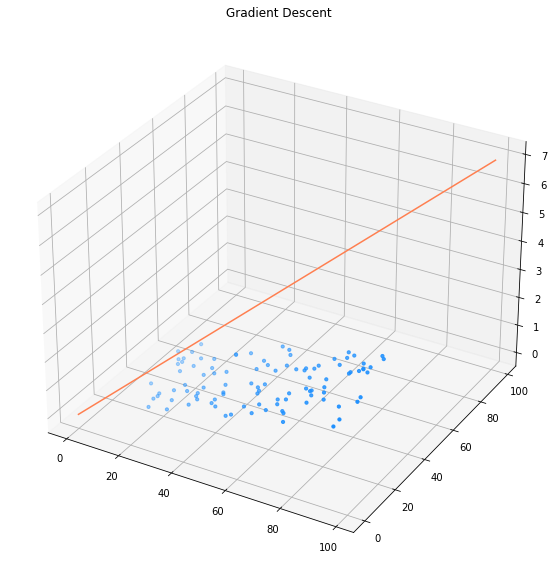

In [42]:
# ve hinh
fig = plt.figure(figsize = (15, 10))
ax = fig.gca(projection = '3d')
ax.scatter(dataset.length, dataset.width, dataset.price, label = 'y', s = 10, color = 'dodgerblue')
ax.plot(np.arange(0, 100), np.arange(0, 100), a_g*np.arange(0, 100) + b_g*np.arange(0, 100) + c_g, label = 'GD regression', color = 'coral')
plt.title('Gradient Descent')
plt.show()

In [43]:
# cac gia tri a, b, c cua Exact Solution
[a_e, b_e, c_e] = np.matmul(np.matmul(np.linalg.inv(np.matmul(z.T, z)), z.T), y)
print(a_e, b_e, c_e)

4992438.834851159 1997577.0972277755 844994.8258750848


C:\Users\LT-030~1\AppData\Local\Temp/ipykernel_15264/304305046.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


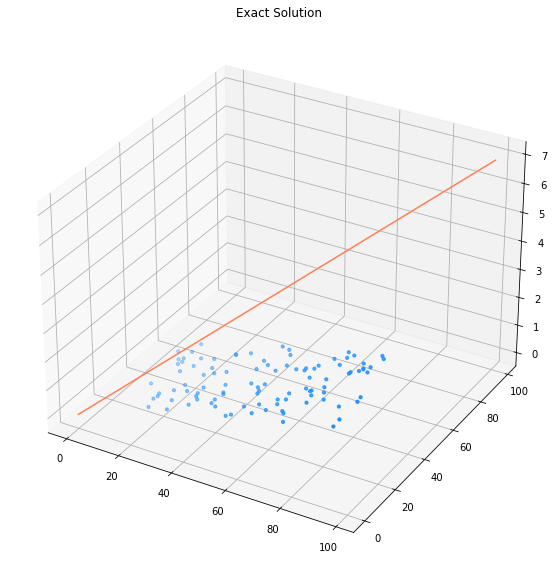

In [44]:
# ve hinh
fig = plt.figure(figsize = (15, 10))
ax = fig.gca(projection = '3d')
ax.scatter(dataset.length, dataset.width, dataset.price, label = 'y', s = 10, color = 'dodgerblue')
ax.plot(np.arange(0, 100), np.arange(0, 100), a_e*np.arange(0, 100) + b_e*np.arange(0, 100) + c_e, label = 'ES regression', color = 'coral')
plt.title('Exact Solution')
plt.show()

In [45]:
# cac gia tri a, b, c cua Sklearn
[a_sk, b_sk] = LinearRegression().fit(x, y).coef_
c_sk = LinearRegression().fit(x, y).intercept_
print(a_sk, b_sk, c_sk)

4992438.834851158 1997577.0972277806 844994.8258749843


C:\Users\LT-030~1\AppData\Local\Temp/ipykernel_15264/1556691068.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


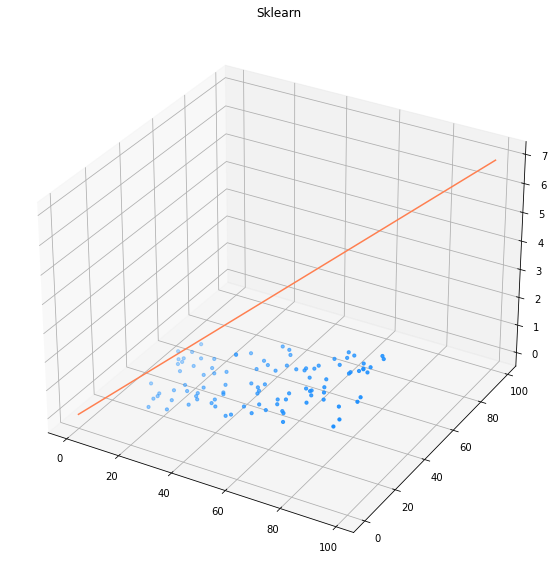

In [46]:
# ve hinh
fig = plt.figure(figsize = (15, 10))
ax = fig.gca(projection = '3d')
ax.scatter(dataset.length, dataset.width, dataset.price, label = 'y', s = 10, color = 'dodgerblue')
ax.plot(np.arange(0, 100), np.arange(0, 100), a_sk*np.arange(0, 100) + b_sk*np.arange(0, 100) + c_sk, label = 'Sklearn regression', color = 'coral')
plt.title('Sklearn')
plt.show()

In [47]:
print('GD MSE:', np.mean(np.square(y - (a_g*x['width'] + b_g*x['length'] + c_g))))
print('Exact SOl MSE:', np.mean(np.square(y - (a_e*x['width'] + b_e*x['length'] + c_e))))
print('SK MSE:', np.mean(np.square(y - (a_sk*x['width'] + b_sk*x['length'] + c_sk))))

GD MSE: 8630577664759.82
Exact SOl MSE: 8629315550589.735
SK MSE: 8629315550589.742
